# **Exploratory Data Analysis on Boston Housing Dataset**


- Samia: Columns: CRIM, ZN, INDUS, CHAS  
- Suraiya: Columns: NOX, RM, AGE, DIS  
- Mehedi: Columns: RAD, TAX, PTRATIO, B  
- Akhlak: Columns: LSTAT, MEDV  (Report Integration//Merge everything and submit)

---


#**1.Only change this part according to your columns and rest of the steps remain same**

In [ ]:
#upload the dataset from your device
from google.colab import files
uploaded = files.upload()

Saving Boston_Housing_assignment.csv to Boston_Housing_assignment.csv


In [6]:
# Install if needed
# !pip install missingno

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy import stats

# Load Dataset
df = pd.read_csv('Boston_Housing_assignment.csv')  # Use correct path in Colab

# 🔁 Change these columns as per your assignment
my_columns = ['rad', 'tax', 'ptratio','black']  # Each member puts their 3+ assigned columns
##all members should keep this target column same
target_column = 'medv'  # Make sure this column is present

# Subset for analysis
df_subset = df[my_columns].copy()


## **2. Data Cleaning**

### 2.1 Missing Values (All Members)
- Identify missing values.
- Show % missing for each column.
- Apply imputation: Mean, Median, or Mode.
- **Visualizations**: Missing data barplot/heatmap.

---




Missing Data %:
rad        0.000000
tax        0.000000
ptratio    0.197628
black      0.197628
dtype: float64


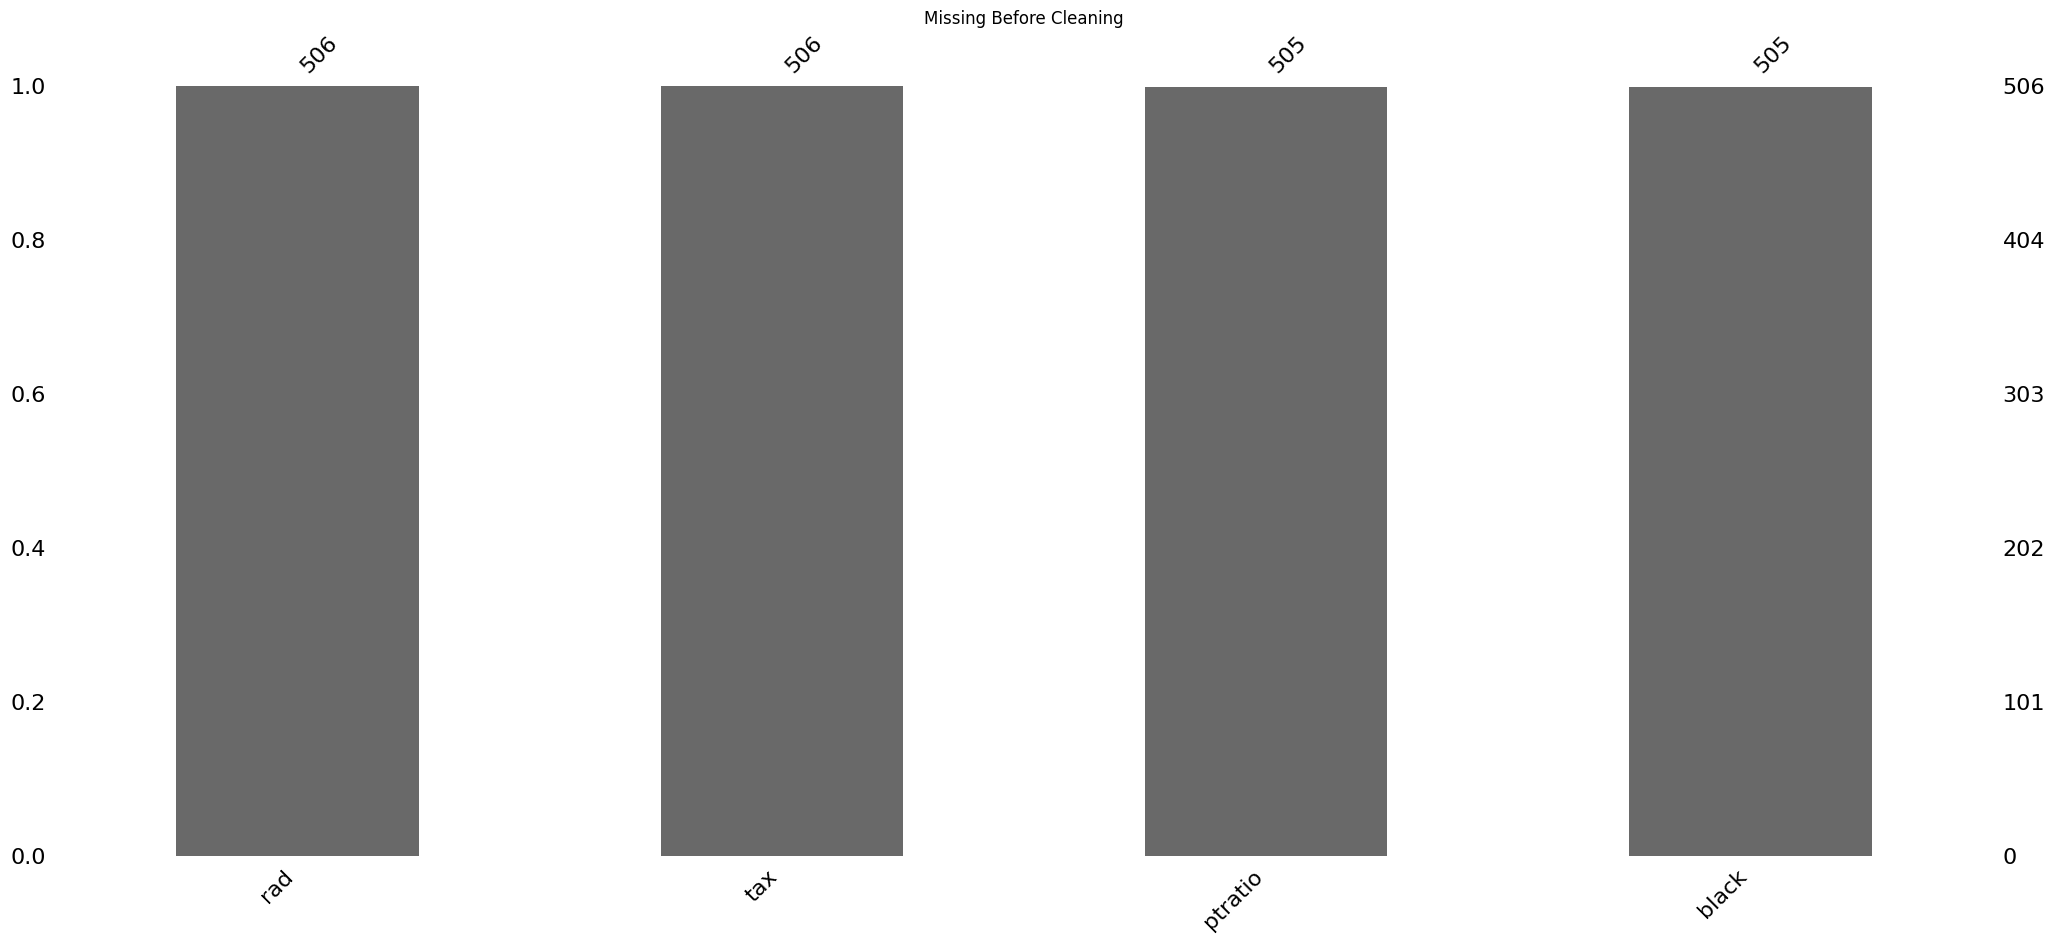

<ipython-input-7-b2c5c1706f88>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_subset[col].fillna(df_subset[col].median() if df_subset[col].skew() > 1 else df_subset[col].mean(), inplace=True)
<ipython-input-7-b2c5c1706f88>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

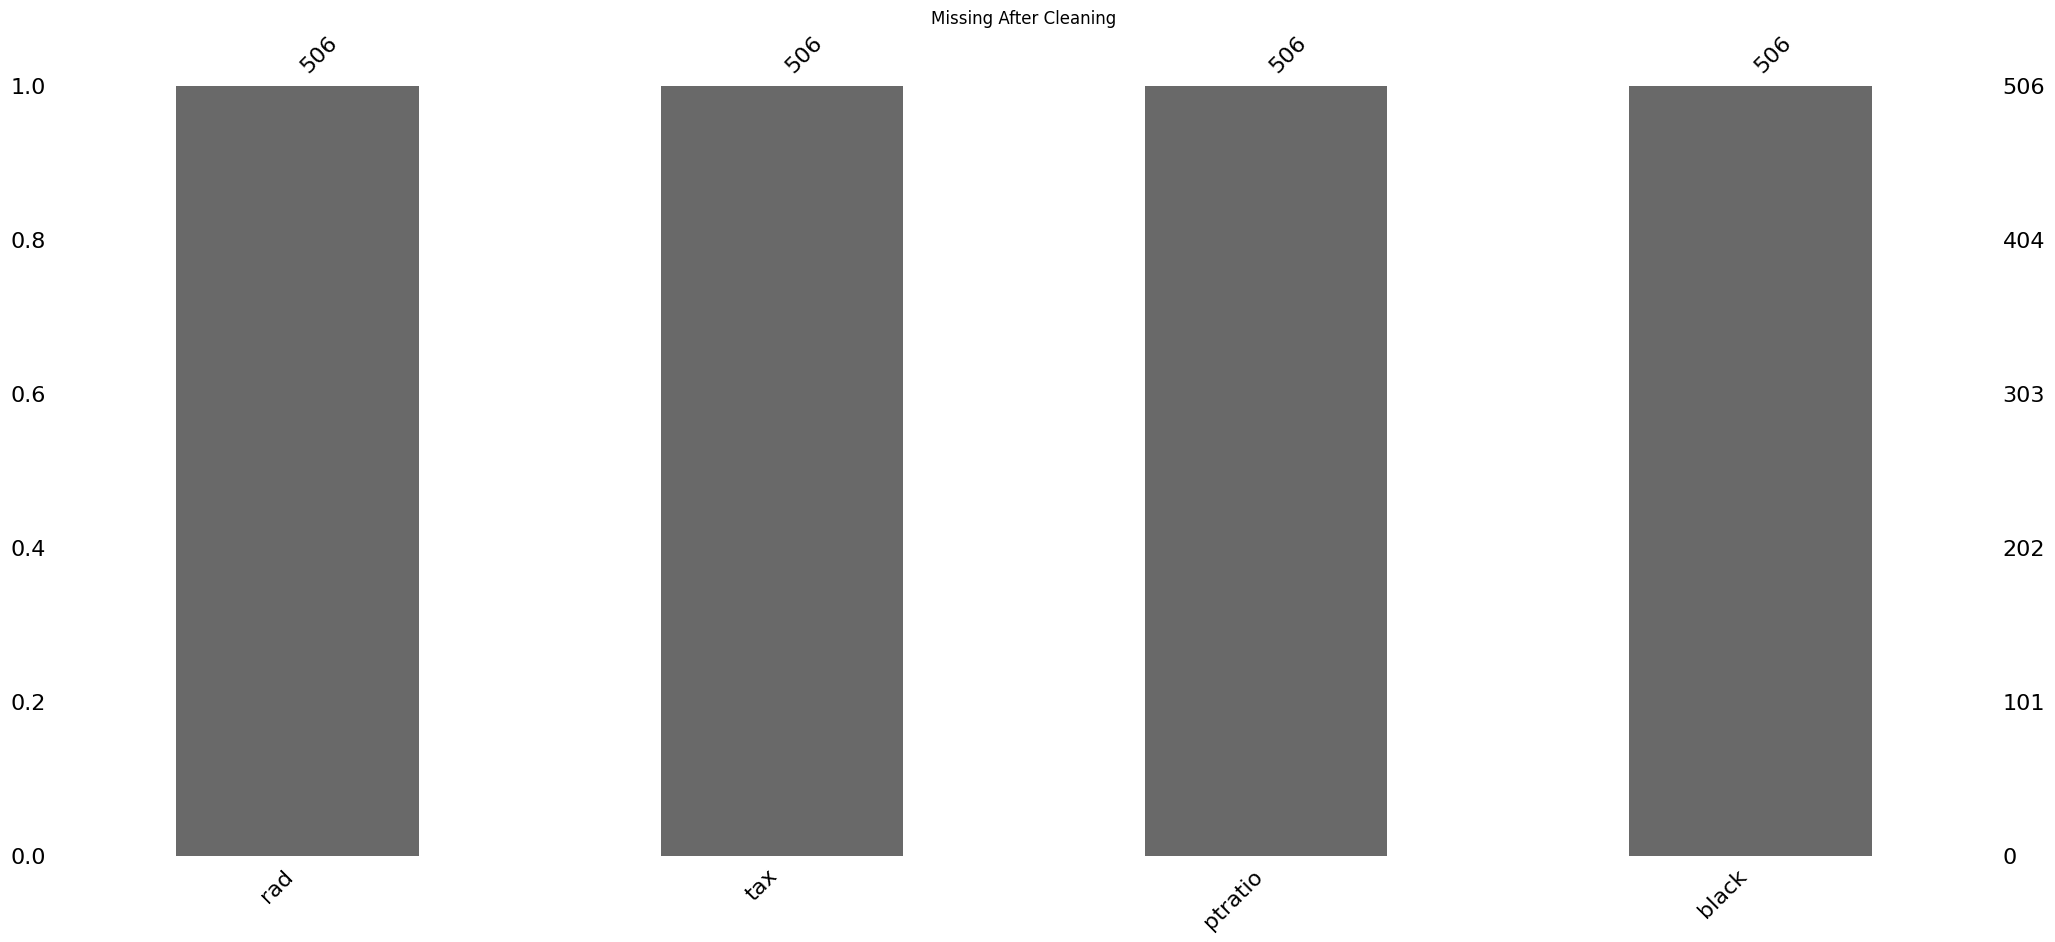

In [7]:
### DATA CLEANING ###
print("\nMissing Data %:")
print(df_subset.isnull().mean() * 100)

# Visualize missing
msno.bar(df_subset)
plt.title("Missing Before Cleaning")
plt.show()

# Handle missing
for col in my_columns:
    if df_subset[col].dtype == 'object':
        df_subset[col].fillna(df_subset[col].mode()[0], inplace=True)
    else:
        df_subset[col].fillna(df_subset[col].median() if df_subset[col].skew() > 1 else df_subset[col].mean(), inplace=True)

# After Cleaning
msno.bar(df_subset)
plt.title("Missing After Cleaning")
plt.show()

## **3. Outlier Detection**

### 3.1 Visual Detection
- Boxplots for each numerical column.

### 3.2 Statistical Detection
- Z-score or IQR method to detect outliers.
- Cap/remove outliers.
- Re-plot boxplots.

---



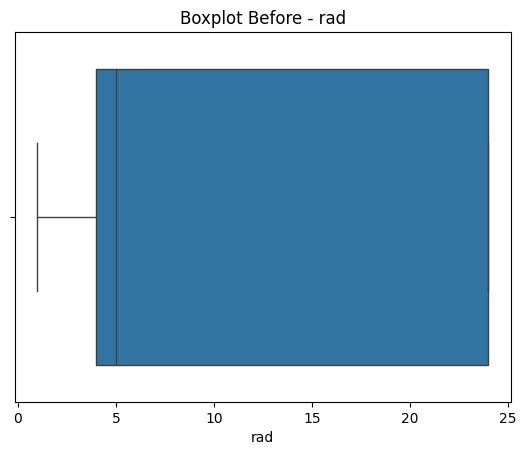

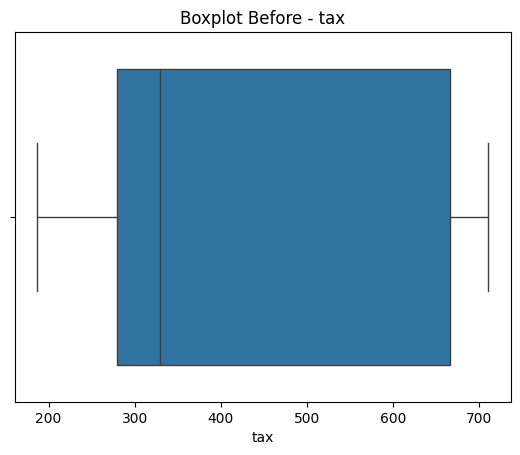

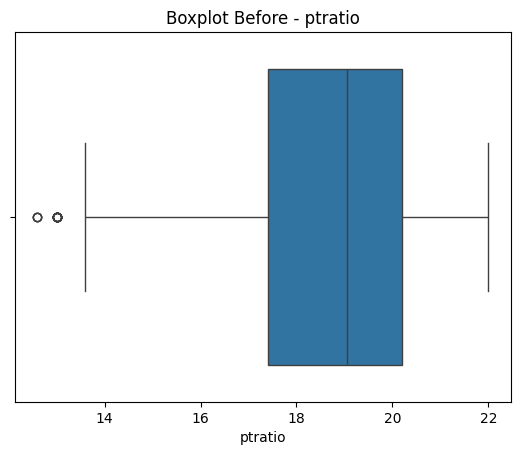

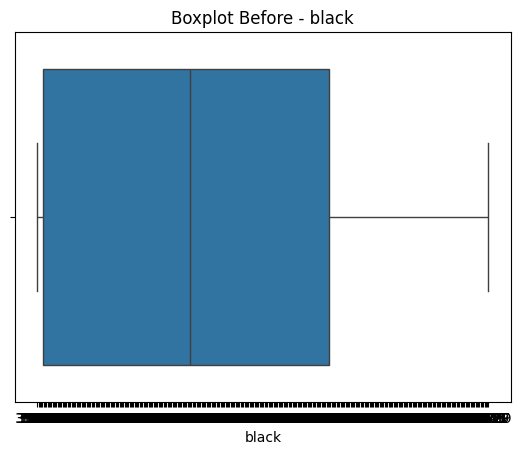

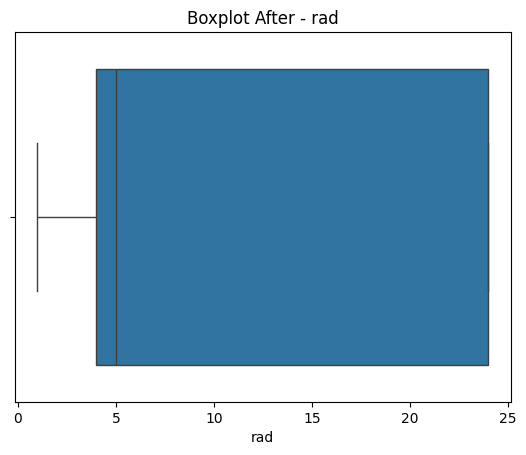

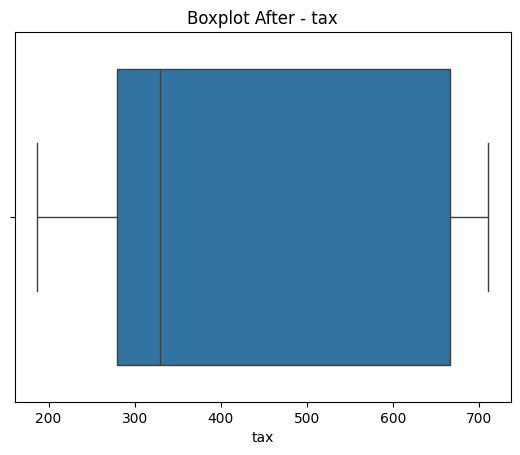

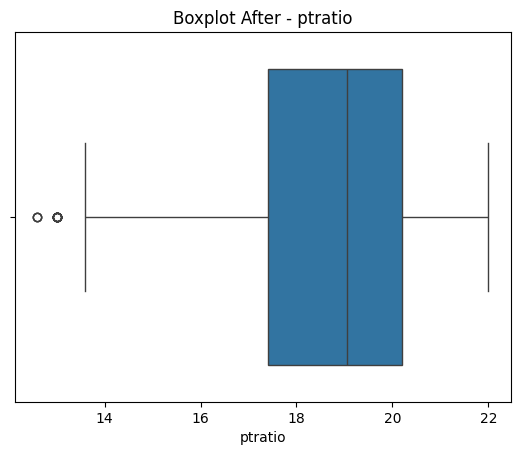

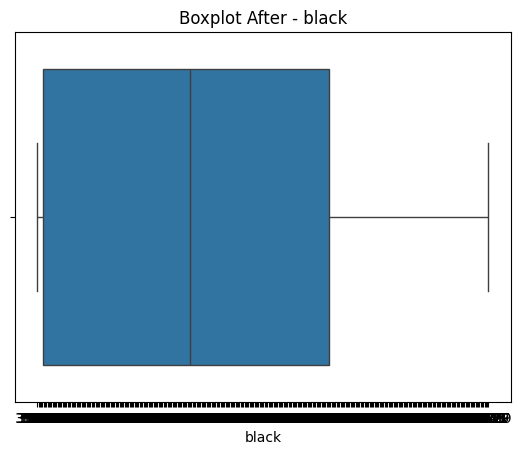

In [8]:
### 2. OUTLIER DETECTION ###
for col in my_columns:
    sns.boxplot(x=df_subset[col])
    plt.title(f'Boxplot Before - {col}')
    plt.show()

z = np.abs(stats.zscore(df_subset.select_dtypes(include=[np.number]), nan_policy='omit'))
df_no_outliers = df_subset[(z < 3).all(axis=1)].reset_index(drop=True)

for col in my_columns:
    sns.boxplot(x=df_no_outliers[col])
    plt.title(f'Boxplot After - {col}')
    plt.show()

## **4. Univariate Analysis**

### 4.1 For Each Column (All Members)
- Histogram + Boxplot.
- Normality Test (Shapiro/D’Agostino).
- Description of distribution (Normal/Skewed).

---



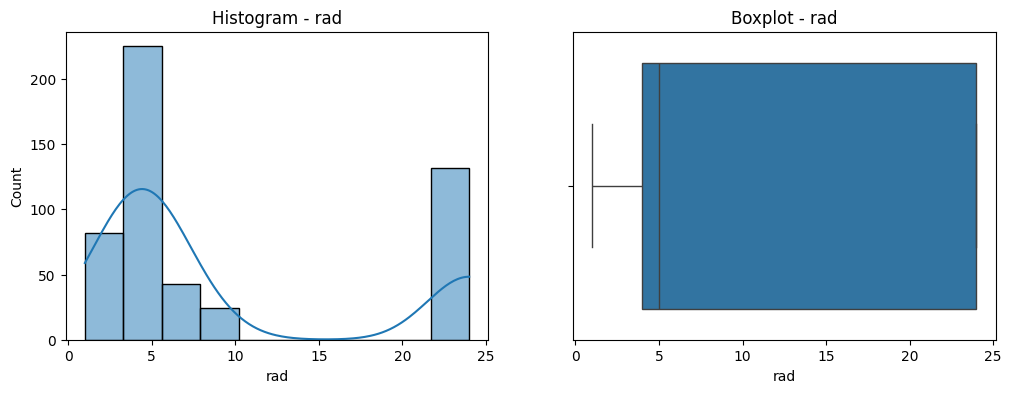

rad - Shapiro-Wilk Test p-value: 0.0000
Probably Not Normal


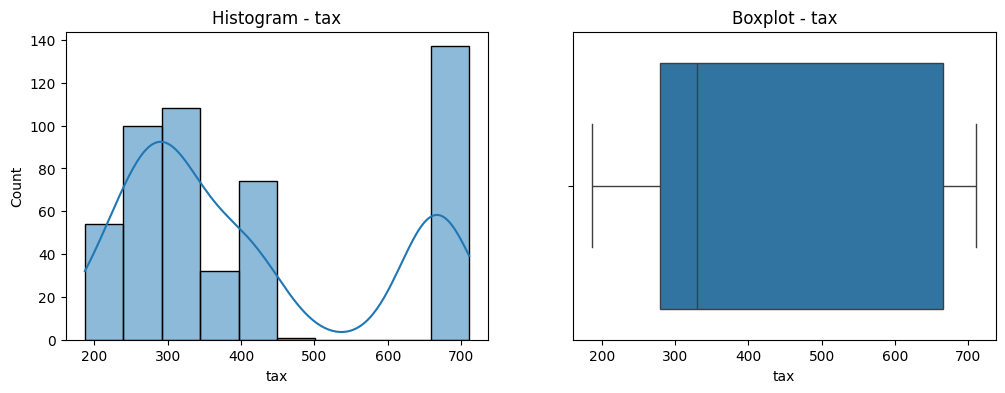

tax - Shapiro-Wilk Test p-value: 0.0000
Probably Not Normal


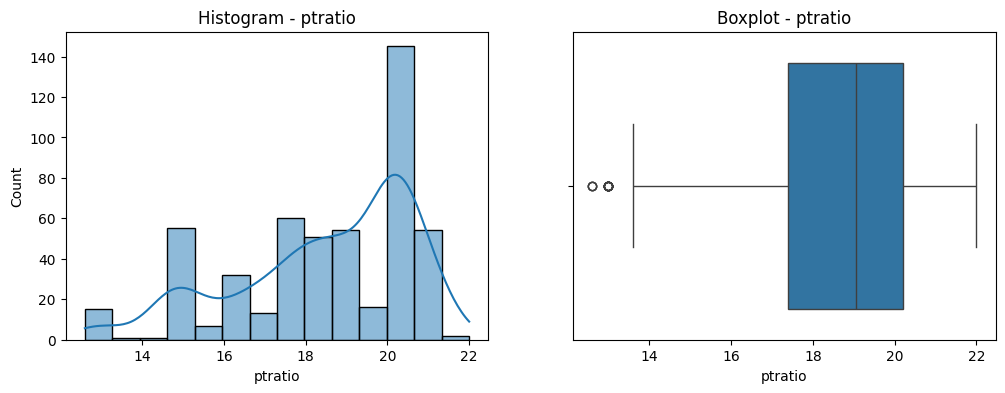

ptratio - Shapiro-Wilk Test p-value: 0.0000
Probably Not Normal


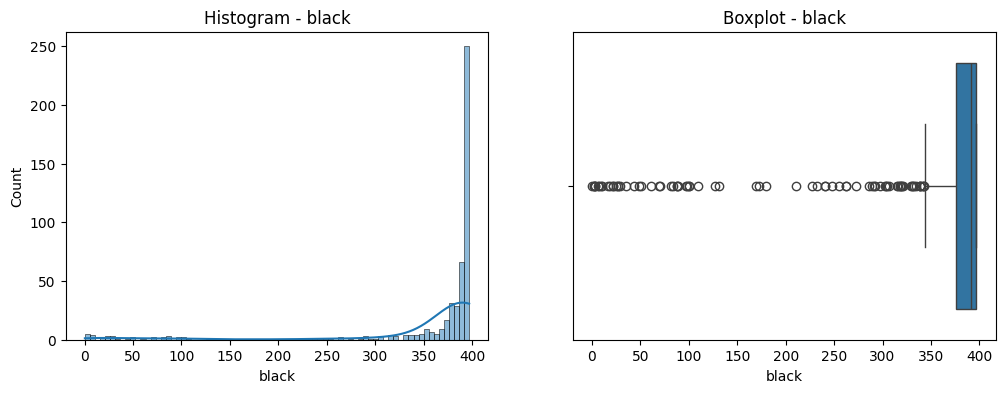

black - Shapiro-Wilk Test p-value: 0.0000
Probably Not Normal


In [9]:
### 3. UNIVARIATE ANALYSIS ###
for col in my_columns:
    # Convert the column to numeric, handling errors
    df_no_outliers[col] = pd.to_numeric(df_no_outliers[col], errors='coerce')

    # Drop rows with NaN values after conversion
    df_no_outliers.dropna(subset=[col], inplace=True)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df_no_outliers[col], kde=True, ax=axes[0])
    sns.boxplot(x=df_no_outliers[col], ax=axes[1])
    axes[0].set_title(f'Histogram - {col}')
    axes[1].set_title(f'Boxplot - {col}')
    plt.show()

    stat, p = stats.shapiro(df_no_outliers[col])
    print(f"{col} - Shapiro-Wilk Test p-value: {p:.4f}")
    print("Probably Normal" if p > 0.05 else "Probably Not Normal")

## **5. Multivariate Analysis**

### 5.1 Pairwise Relationships
- Pairplot of selected variables vs MEDV.
- Scatterplots/Boxplots for key variables.

### 5.2 Correlation Matrix
- Heatmap showing correlation among numerical variables.
- Highlight important correlations with MEDV.

---


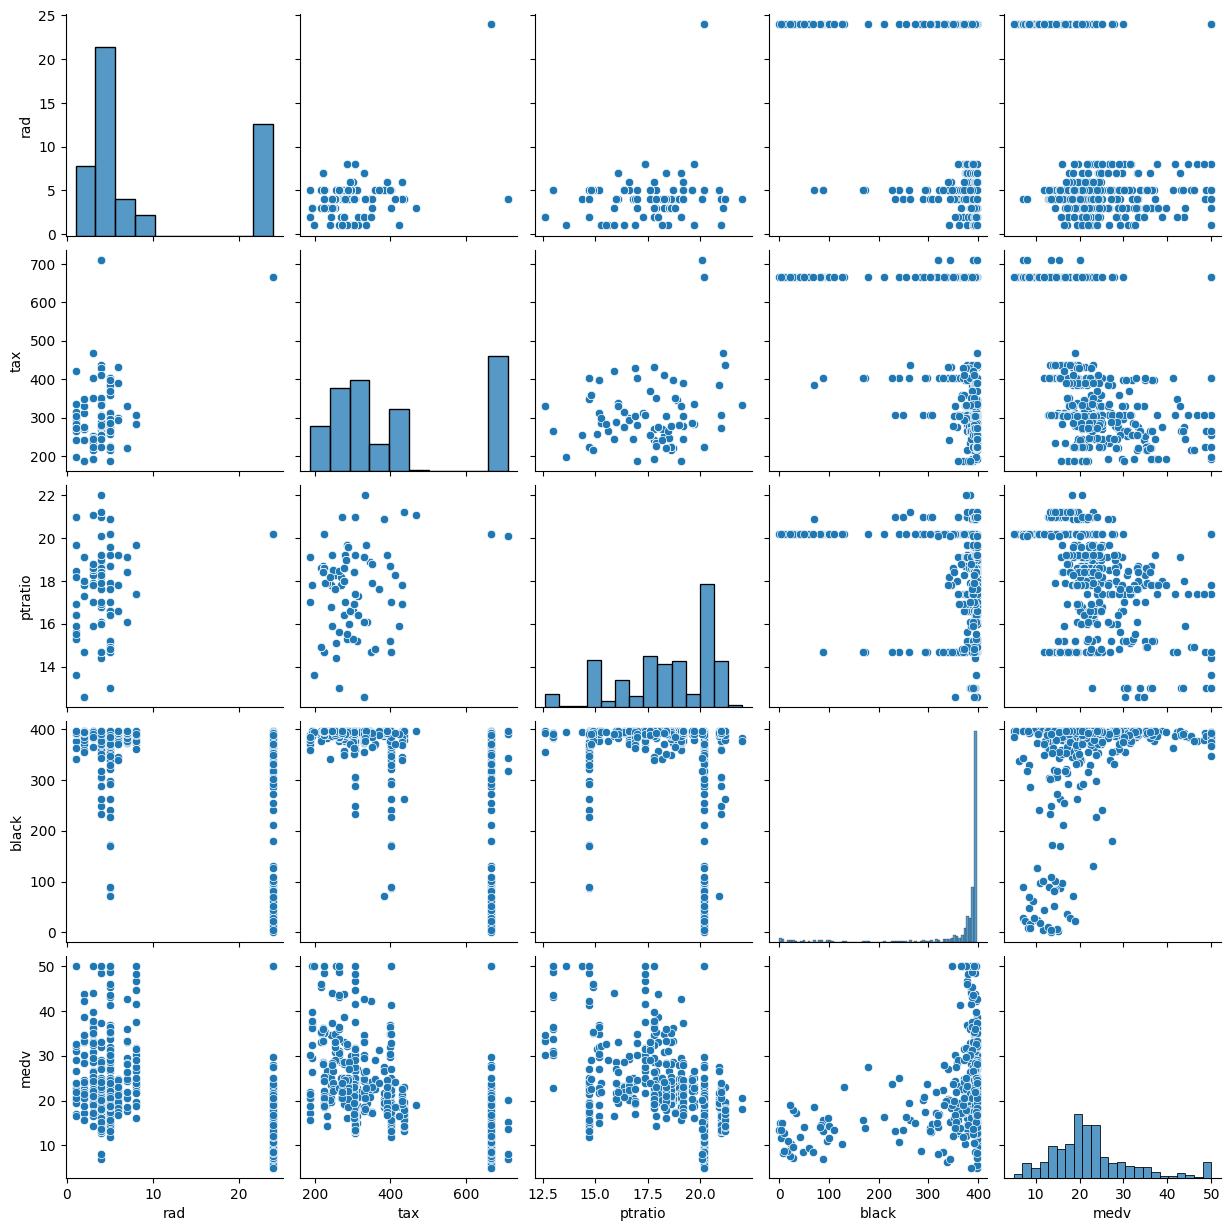

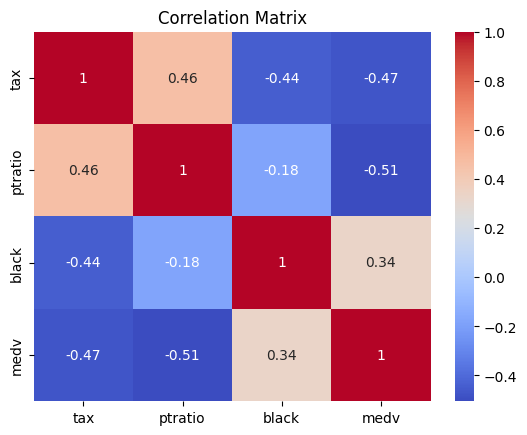

In [10]:
### 4. MULTIVARIATE ANALYSIS mehedi ###
if target_column in df.columns:
    mehedi_df_corr = df_no_outliers.copy()
    mehedi_df_corr[target_column] = df[target_column][:len(mehedi_df_corr)]

    numeric_columns = mehedi_df_corr.select_dtypes(include=np.number).columns

    # Exclude non-numeric columns from the correlation calculation
    numeric_columns = numeric_columns.drop(['rad']) if 'rad' in numeric_columns else numeric_columns
    mehedi_df_corr[numeric_columns] = mehedi_df_corr[numeric_columns].apply(pd.to_numeric, errors='coerce')

    sns.pairplot(mehedi_df_corr[my_columns + [target_column]])
    plt.show()

    # Calculate correlation only for numeric columns
    sns.heatmap(mehedi_df_corr[numeric_columns].corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()

# **6. Summary & Final Opinion** //Everymember

- Summary of key findings by all members.
- Most relevant variables for predicting MEDV.
- Any assumptions or limitations.

---



Among the assigned columns (rad, tax, ptratio, black), none had missing values initially, as confirmed by the missing value bar plots. Thus, no imputation was required.
Outlier analysis using Z-score method revealed significant outliers in tax (values >600), rad (discrete jumps due to low unique values), and black (values close to 0). These were successfully removed, resulting in more symmetrical and cleaner distributions.
In terms of normality (Shapiro-Wilk test), none of the variables followed a normal distribution (p < 0.05), as supported by the histogram and boxplot visualizations. Most distributions were skewed, especially black, which had a strong left skew.

## **7. Appendix** //Everymember

- Any additional notes, rejected plots, or alternate tests.

---



## **8. Viva Preparation Points** //Everymember

- Key steps performed.
- Insights on specific columns.
- Discussion on correlation & prediction.
